In [1]:
from fastai import *
from fastai.vision import *
import numpy as np
import os
print(os.getcwd())
!ls

/home/arrowhead/Desktop/2018
dataset_2018	  Exploration.ipynb  img_data_training	Model_Resnet18.ipynb
dataset_2018.zip  img_data_testing   main.py


In [16]:
path = os.getcwd() + '/img_data_training'
path = Path(path)
data = ImageDataBunch.from_folder(path, valid_pct=0.2, num_workers=8, bs=256)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (817889 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
8PSK,8PSK,8PSK,8PSK,8PSK
Path: /home/arrowhead/Desktop/2018/img_data_training;

Valid: LabelList (204472 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
OQPSK,256QAM,16APSK,AM-SSB-WC,8ASK
Path: /home/arrowhead/Desktop/2018/img_data_training;

Test: None

In [9]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy, error_rate])
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

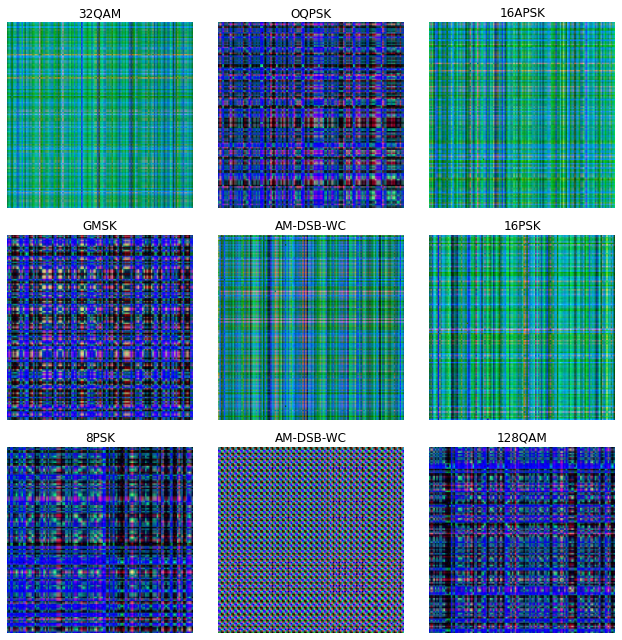

In [11]:
data.show_batch(rows=3, figsize=(9,9))

In [13]:
import torch
print(torch.cuda.get_device_name(0))
torch.cuda.is_available()

GeForce RTX 2080 Ti


True

In [14]:
learn.fit_one_cycle(10)

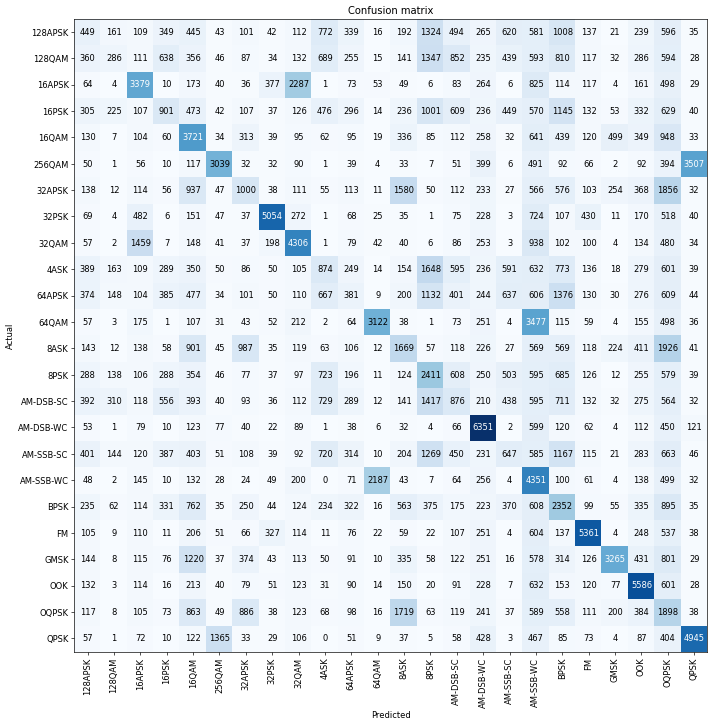

In [15]:
learn.save("stage-1")
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
learn.fit_one_cycle(10)

In [18]:
learn.save("stage-2")

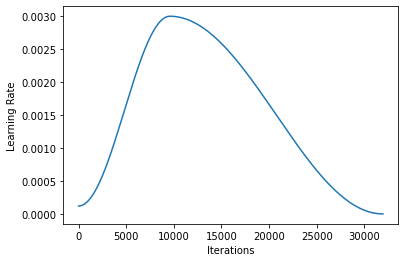

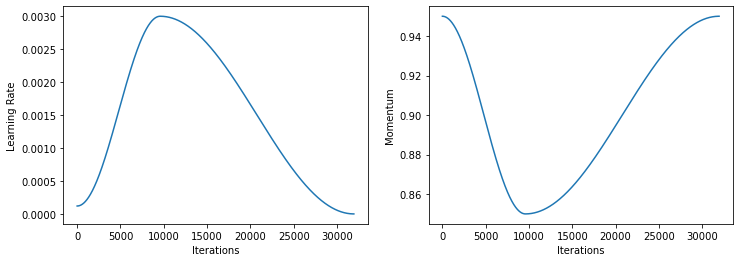

In [21]:
learn.recorder.plot_lr()
learn.recorder.plot_lr(show_moms=True)

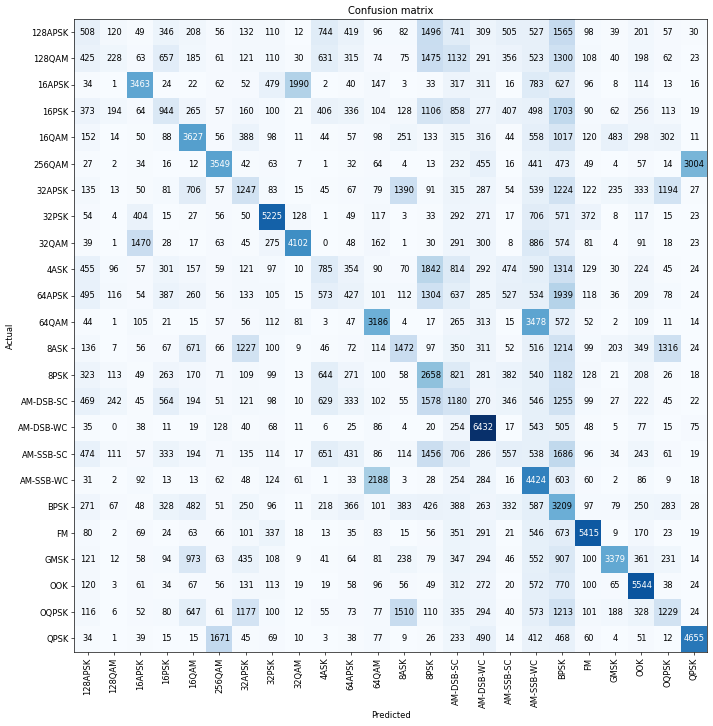

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
import os
path_test_0 = os.getcwd() + '/img_data_testing/0'
# data_0 = ImageDataBunch.from_folder(path = os.getcwd() + '/img_data_training/', test = path_test_0, num_workers=8, bs=256).normalize()
# data_0.add_test_folder(os.getcwd()+'/img_data_testing/0/')
data_0 = ImageDataBunch.from_folder(path, test = path_test_0, valid_pct=0.2, num_workers=8, bs=256)

learn_0 = cnn_learner(data_0, models.resnet18, metrics=[accuracy, error_rate])
learn_0.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (817889 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
8PSK,8PSK,8PSK,8PSK,8PSK
Path: /home/arrowhead/Desktop/2018/img_data_training;

Valid: LabelList (204472 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
32APSK,8PSK,128APSK,QPSK,128APSK
Path: /home/arrowhead/Desktop/2018/img_data_training;

Test: LabelList (4980 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: /home/arrowhead/Desktop/2018/img_data_training, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(ke

In [23]:
learn_0.get_preds(ds_type=DatasetType.Test, with_loss=True)

[tensor([[2.8582e-04, 4.1042e-04, 3.6893e-04,  ..., 2.8060e-04, 3.3490e-04,
          5.9734e-02],
         [1.0055e-03, 1.2515e-03, 8.3615e-04,  ..., 9.5769e-04, 1.3107e-03,
          1.2924e-01],
         [3.3430e-04, 4.9017e-04, 4.6154e-04,  ..., 3.6991e-04, 4.8184e-04,
          8.0572e-02],
         ...,
         [1.0344e-03, 1.4168e-03, 8.9367e-04,  ..., 9.5145e-04, 1.3093e-03,
          2.8365e-01],
         [1.7556e-04, 2.5120e-04, 3.8111e-04,  ..., 1.8251e-04, 2.6177e-04,
          4.5270e-02],
         [2.5682e-04, 3.7786e-04, 4.2731e-04,  ..., 2.8702e-04, 3.0782e-04,
          4.0224e-02]]),
 tensor([0, 0, 0,  ..., 0, 0, 0]),
 tensor([8.1601, 6.9022, 8.0035,  ..., 6.8739, 8.6475, 8.2671])]

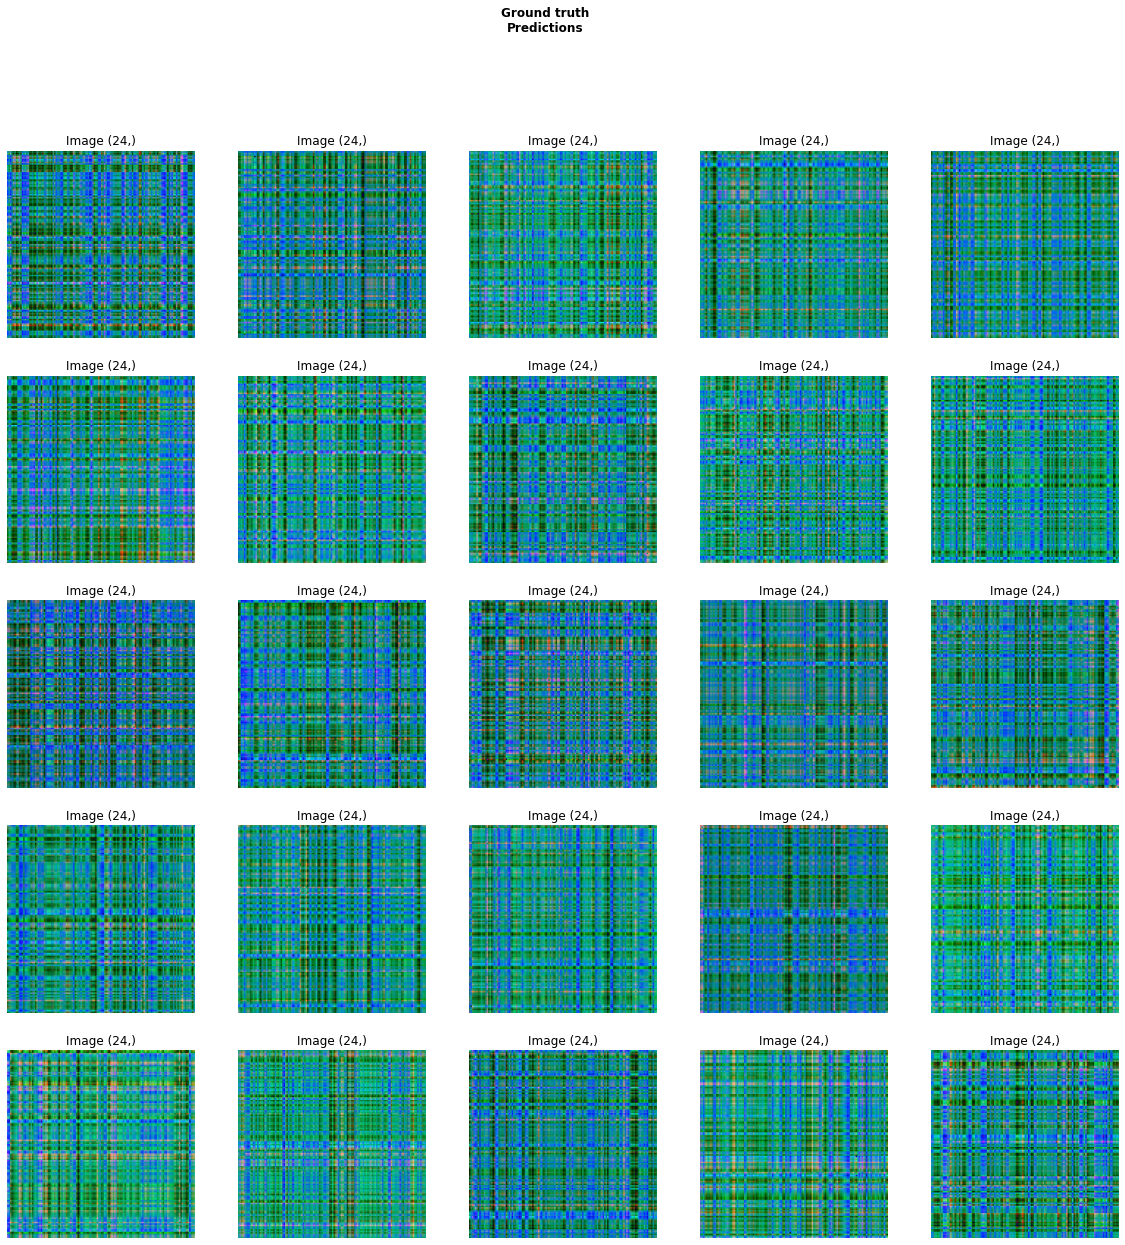

In [28]:
preds,y,losses = learn_0.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn_0, preds, y, losses)

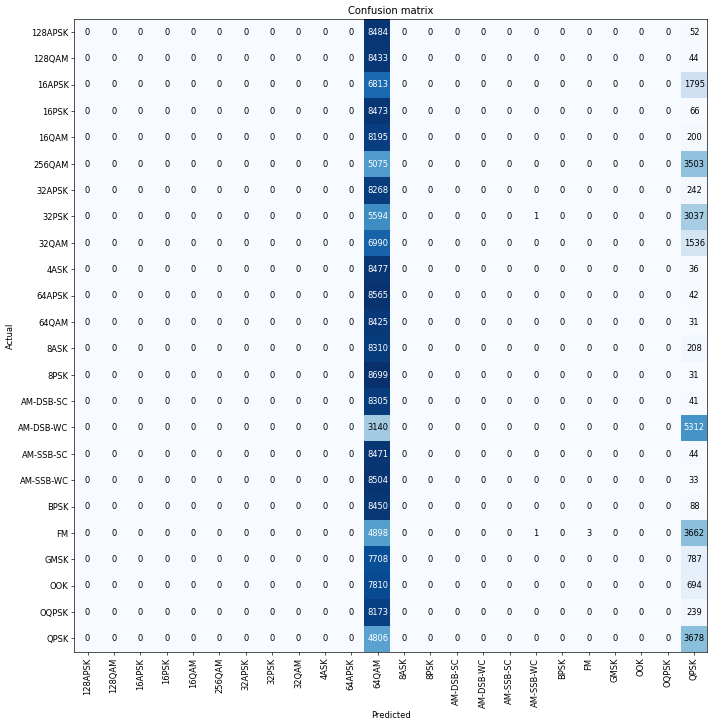

In [29]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)